# matplotlib

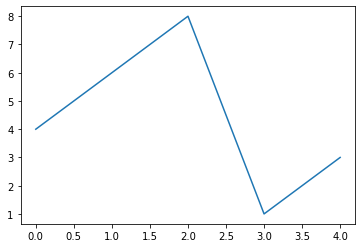

In [1]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt

# 차트 그리기
plt.plot([4, 6, 8, 1, 3])
plt.show()

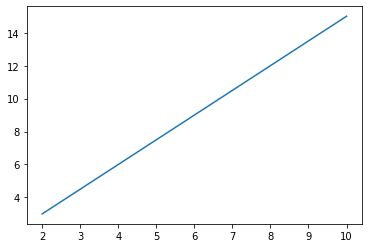

In [2]:
# x축 y축 값 지정
x = [2, 4, 6, 8, 10]
y = [3, 6, 9, 12, 15]

plt.plot(x, y)
plt.show()

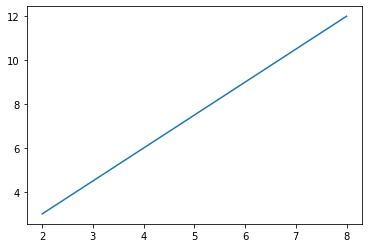

In [3]:
# 딕셔너리로 값 지정
dict = {'x' : [2, 4, 6, 8],
        'y' : [3, 6, 9, 12],  
        'z' : [1, 2, 3, 4]
}

plt.plot('x', 'y', '', data = dict)
plt.show()

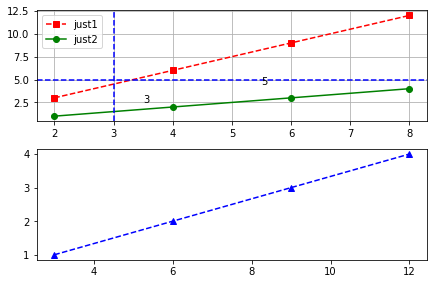

In [17]:
# 차트 꾸미기 종합 연습
plt.subplot(2, 1, 1)
plt.plot('x', 'y', 'rs--', data = dict, label = 'just1')
plt.plot('x', 'z', 'go-', data = dict, label = 'just2')
plt.xlabel = ('odd')
plt.ylabel = ('even')
plt.title = ('number')
plt.axhline(5, color = 'blue', linestyle = '--')
plt.axvline(3, color = 'blue', linestyle = '--')
plt.text(5.5, 4.4, '5')
plt.text(3.5, 2.5, '3')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot('y', 'z', 'b^--', data = dict, label = 'just3')

plt.tight_layout()
plt.show()

# 단변량분석 (숫자형 변수)

In [22]:
# 라이브러리
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
# 데이터 1
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv')
titanic.dropna(axis = 0, inplace = True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton


In [7]:
# 데이터 2
air = pd.read_csv('https://bit.ly/3qmthqZ')
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


In [8]:
# 평균
print(titanic['Age'].mean())

# 조화평균
# 출발 승객 평균 나이 28
# 복귀 승객 평균 나이 33
a = 28
b = 33
ab_mean = 2 * a * b / (a + b)
print(round(ab_mean, 2))

29.64209269662921
30.3


In [9]:
# 중앙값
print(titanic['Age'].median())

28.0


In [10]:
# 최빈값
a = pd.Series(titanic['Age'])
a.mode()

0    24.0
Name: Age, dtype: float64

In [11]:
# 4분위 수
print(np.percentile(titanic['Age'], [0, 25, 50, 75, 100]))

[ 0.42 20.   28.   38.   80.  ]


In [12]:
# 기초 통계량 series
titanic['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
# 기초 통계량 DataFrame
titanic.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,34.567251
std,258.683191,0.491139,0.836854,14.492933,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


# 시계열 데이터 시각화

TypeError: 'str' object is not callable

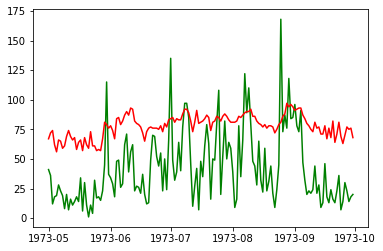

In [18]:
air['Date'] = pd.to_datetime(air['Date']) # 날짜 형식으로 변환

plt.plot('Date', 'Ozone', 'g-', data = air, label = 'Ozone')
plt.plot('Date', 'Temp', 'r-', data = air, label = 'Temp')

plt.xlabel('Date')
plt.legend()
plt.show()

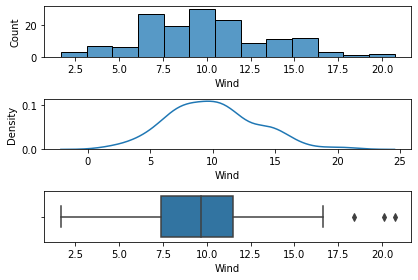

In [24]:
a = air['Wind']

plt.subplot(3, 1, 1)
sns.histplot(a)
plt.subplot(3, 1, 2)
sns.kdeplot(a)
plt.subplot(3, 1, 3)
sns.boxplot(a)
plt.tight_layout()
plt.show()

# 단편량분석 (범주형 변수)

In [26]:
# 판다스를 이용한 기초 통계량
print(titanic['Embarked'].value_counts())
print(titanic['Embarked'].value_counts()/titanic.shape[0])

Southhampton    554
Cherbourg       130
Queenstown       28
Name: Embarked, dtype: int64
Southhampton    0.778090
Cherbourg       0.182584
Queenstown      0.039326
Name: Embarked, dtype: float64


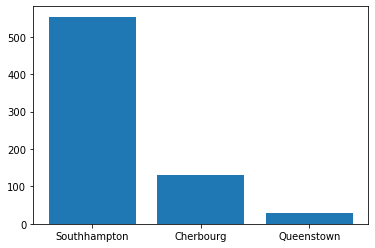

In [31]:
# 시각화 하기
temp = titanic['Embarked'].value_counts()
plt.bar(temp.index, temp.values)
plt.show()

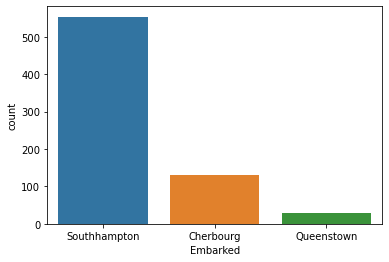

In [32]:
# 시각화 하기 2
sns.countplot(titanic['Embarked'])
plt.show()

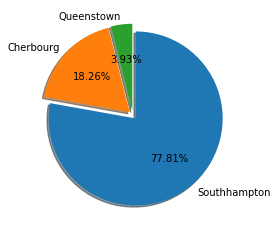

In [33]:
# 시각화 하기 3
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%', 
        startangle=90, counterclock=False, 
        explode = [0.05, 0.05, 0.05], shadow=True)
plt.show()

# Seaborn의 다양한 그래프들

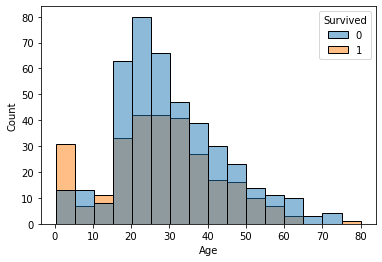

In [34]:
sns.histplot(data = titanic, x='Age', bins = 16, hue = 'Survived')
plt.show()

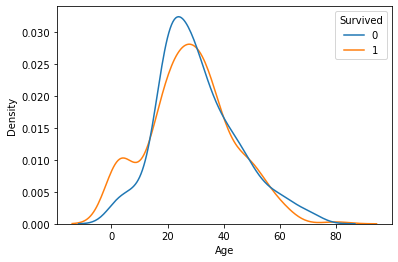

In [35]:
sns.kdeplot(data = titanic, x = 'Age', hue = 'Survived', common_norm = False)
plt.show()

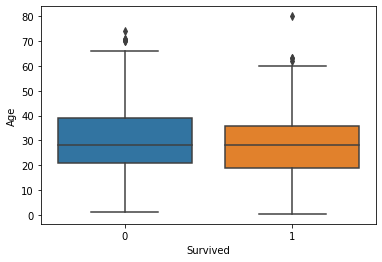

In [36]:
sns.boxplot(data = titanic, y = 'Age', x = 'Survived')
plt.show()

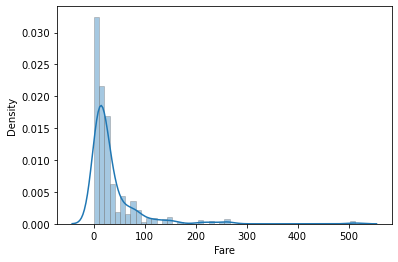

In [39]:
sns.distplot(titanic['Fare'], bins = 50, hist_kws = {'edgecolor':'grey'})
plt.show()

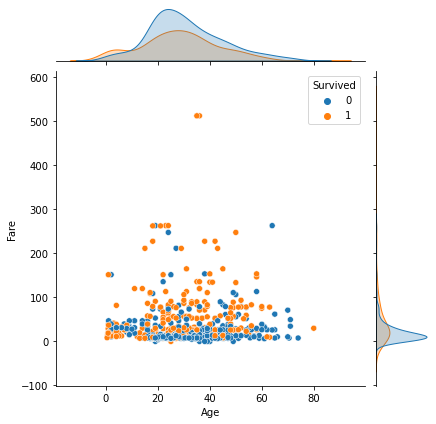

In [41]:
sns.jointplot(x='Age', y='Fare', hue = 'Survived', data = titanic)
plt.show()

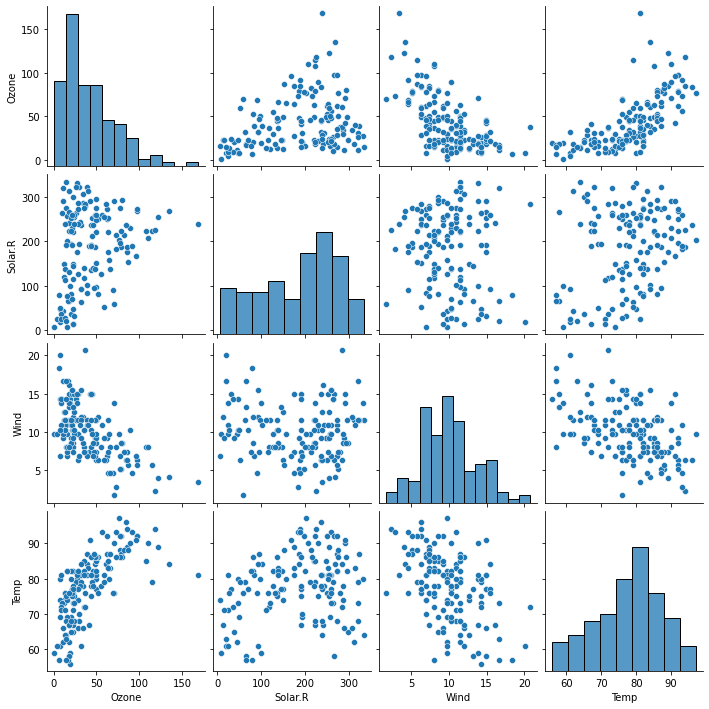

In [44]:
sns.pairplot(air)
plt.show()

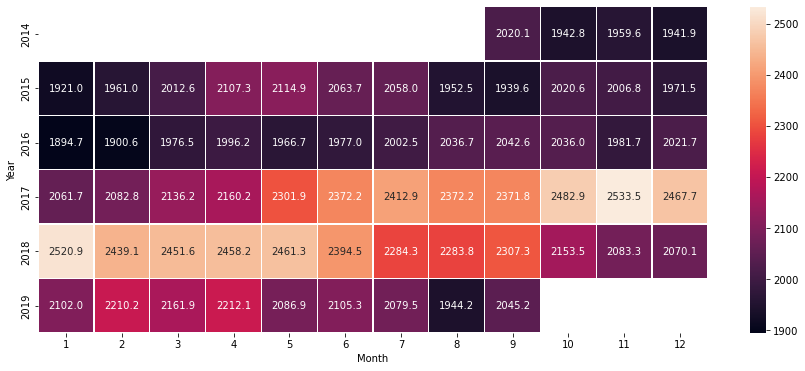

In [51]:
# 코스피 지수
stock = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/KOSPI.csv')
stock['Date'] = pd.to_datetime(stock['Date'])
stock['Year'] = stock.Date.dt.year
stock['Month'] = stock.Date.dt.month
stock['Weekday'] = stock.Date.dt.weekday
stock.head()

temp1 = stock.groupby(['Year','Month'], as_index = False)['Close'].mean()
temp2 = temp1.pivot( 'Year','Month', 'Close')

plt.figure(figsize = (15,6))
sns.heatmap(temp2, annot = True, fmt = '.1f', linewidth = .2)
plt.show()

# 이변량 숫자 vs 숫자

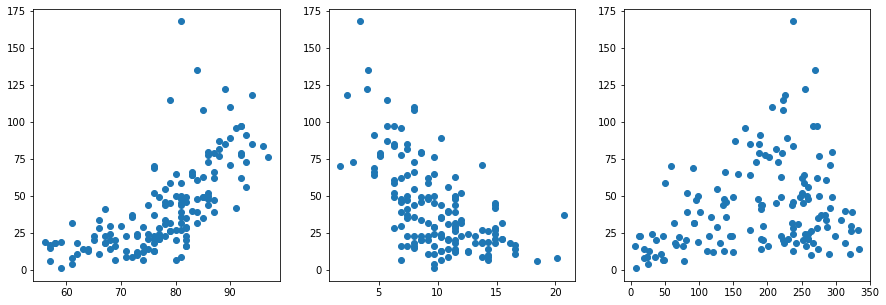

In [54]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.scatter('Temp', 'Ozone', data = air)

plt.subplot(1,3,2)
plt.scatter('Wind', 'Ozone', data = air)

plt.subplot(1,3,3)
plt.scatter('Solar.R', 'Ozone', data = air)

plt.show()

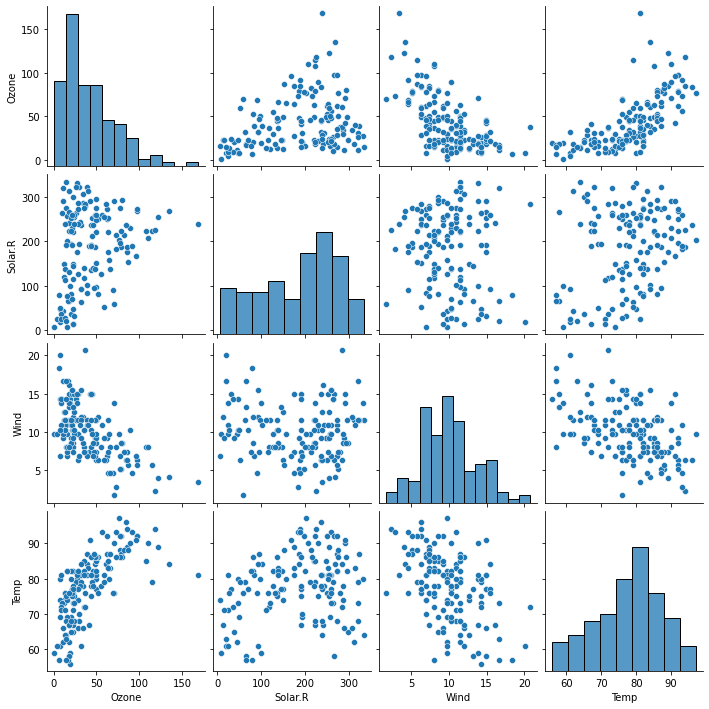

In [55]:
sns.pairplot(air)

In [56]:
import scipy.stats as spst

In [57]:
# 상관계수와 p-value 
spst.pearsonr(air['Temp'], air['Ozone'])

(0.6833717861490114, 2.197769800200274e-22)

In [58]:
air.corr()

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.280068,-0.605478,0.683372
Solar.R,0.280068,1.000000,-0.056792,0.275840
Wind,-0.605478,-0.056792,1.000000,-0.457988
Temp,0.683372,0.275840,-0.457988,1.000000


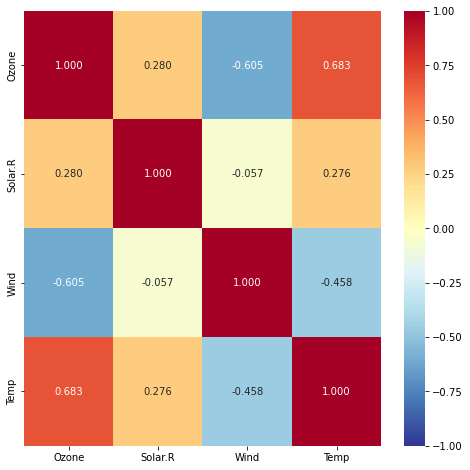

In [59]:
plt.figure(figsize = (8, 8))
sns.heatmap(air.corr(), annot = True, fmt = '.3f', cmap = 'RdYlBu_r',  vmin = -1, vmax = 1)
plt.show()